In [1]:
# Importing libraries for data handling, visualization, and preprocessing
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
pd.set_option('max_colwidth', 2000)
pd.set_option('display.max_rows', 27000)
pd.set_option('display.max_columns', 20000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
output_dir = 'plots'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created successfully.")
else:
    print(f"Directory '{output_dir}' already exists.")

Directory 'plots' already exists.


In [3]:
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset with notes loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise
print("\nDataset Shape:", df.shape)

Dataset with notes loaded successfully!

Dataset Shape: (284807, 31)


In [4]:
# Checking and removing duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicates removed. New Dataset Shape:", df.shape)


Number of Duplicate Rows: 1081
Duplicates removed. New Dataset Shape: (283726, 31)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [6]:
print("\nClass Distribution:\n", df['Class'].value_counts(normalize=True))


Class Distribution:
 Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [7]:
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


From the previous statistical measurements:
- There are outliers in data 
- It is acceptable for the columns (V1 to V28) to have negative values for their Mean or Median (or both). This is because these columns represent the results from PCA, and data is typically centered before the transformation, which results in the Mean of each component being zero or very close to zero.

In [9]:
df['Amount_log'] = np.log(df['Amount'] + 1)

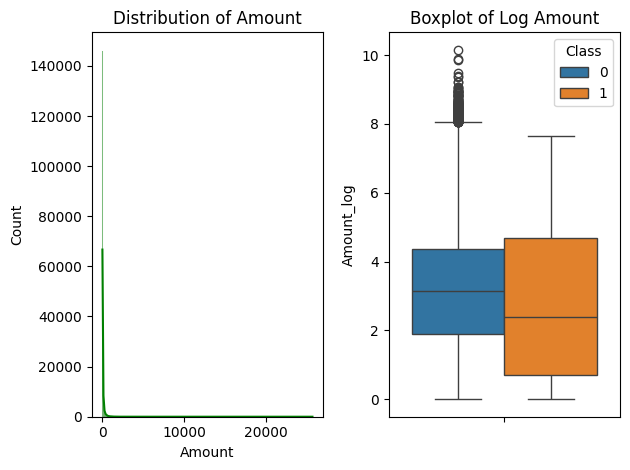

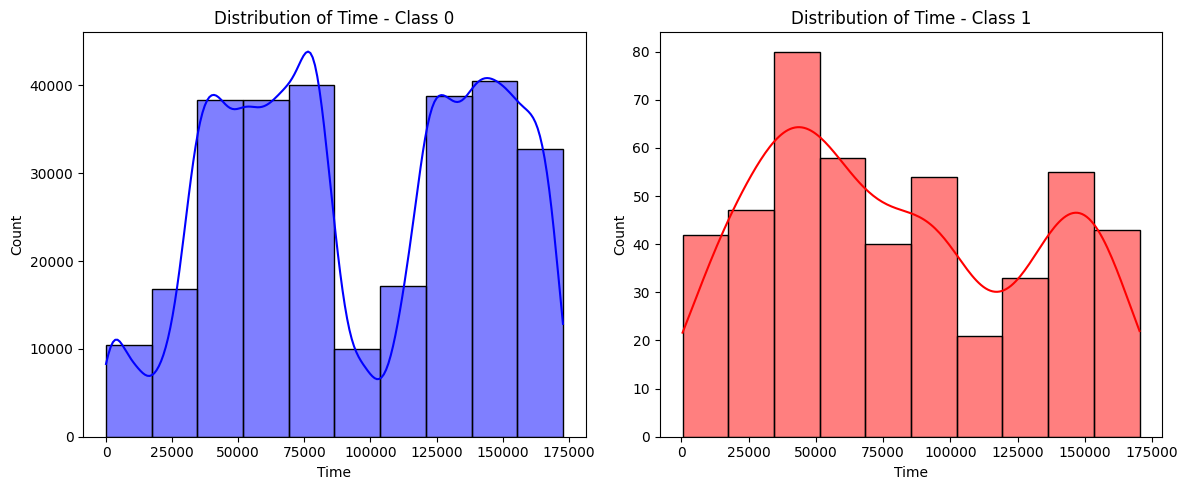

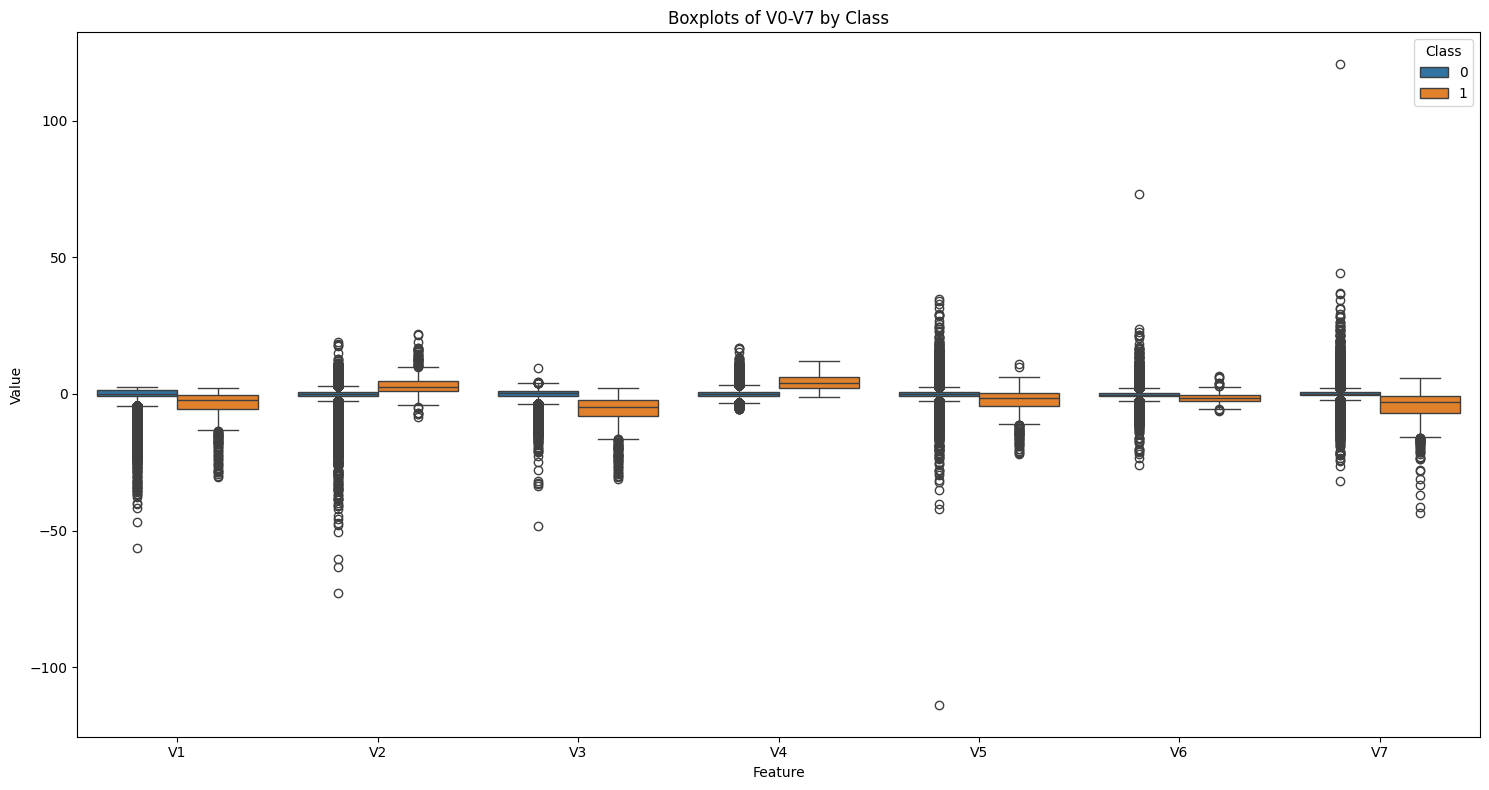

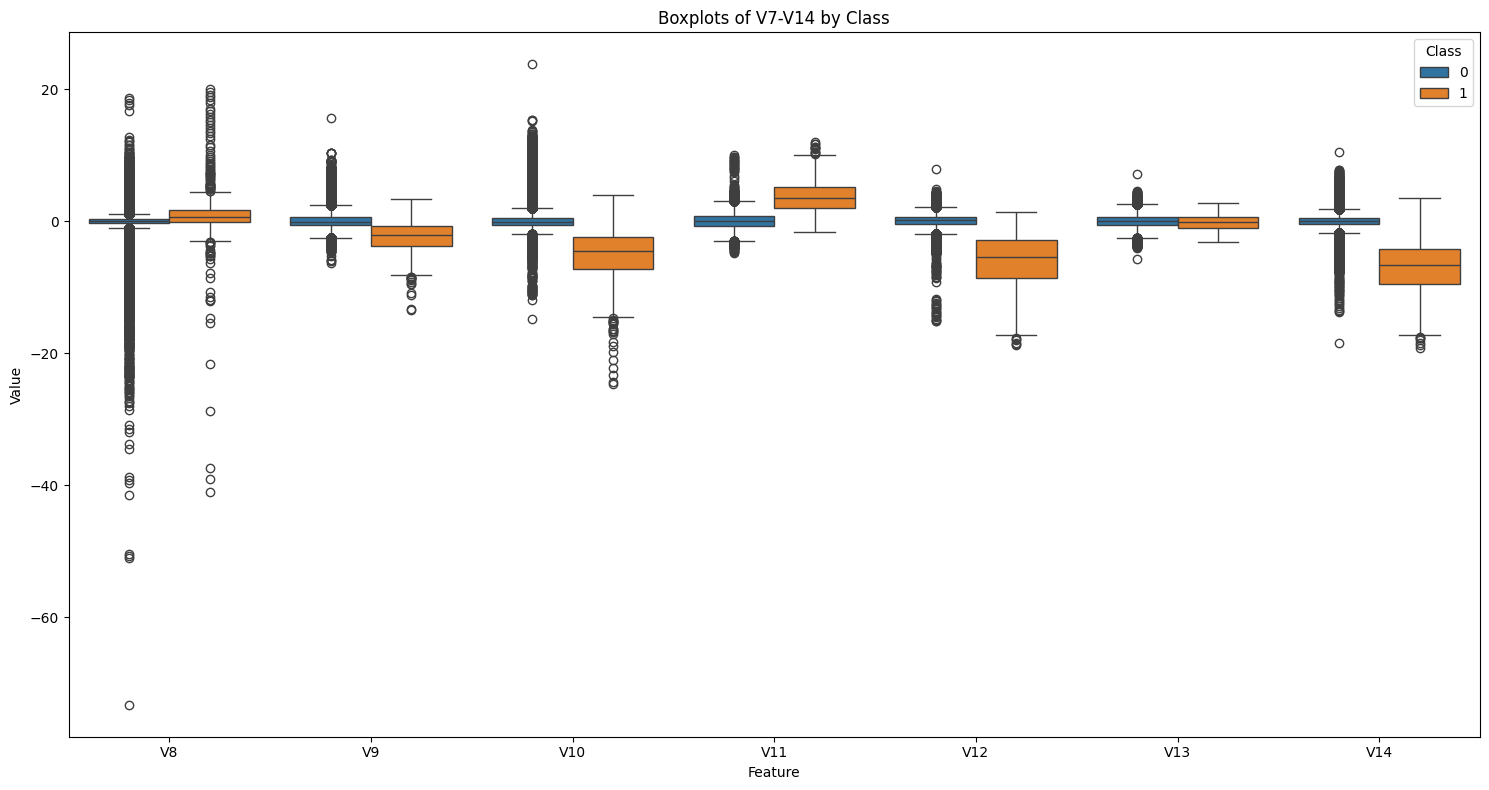

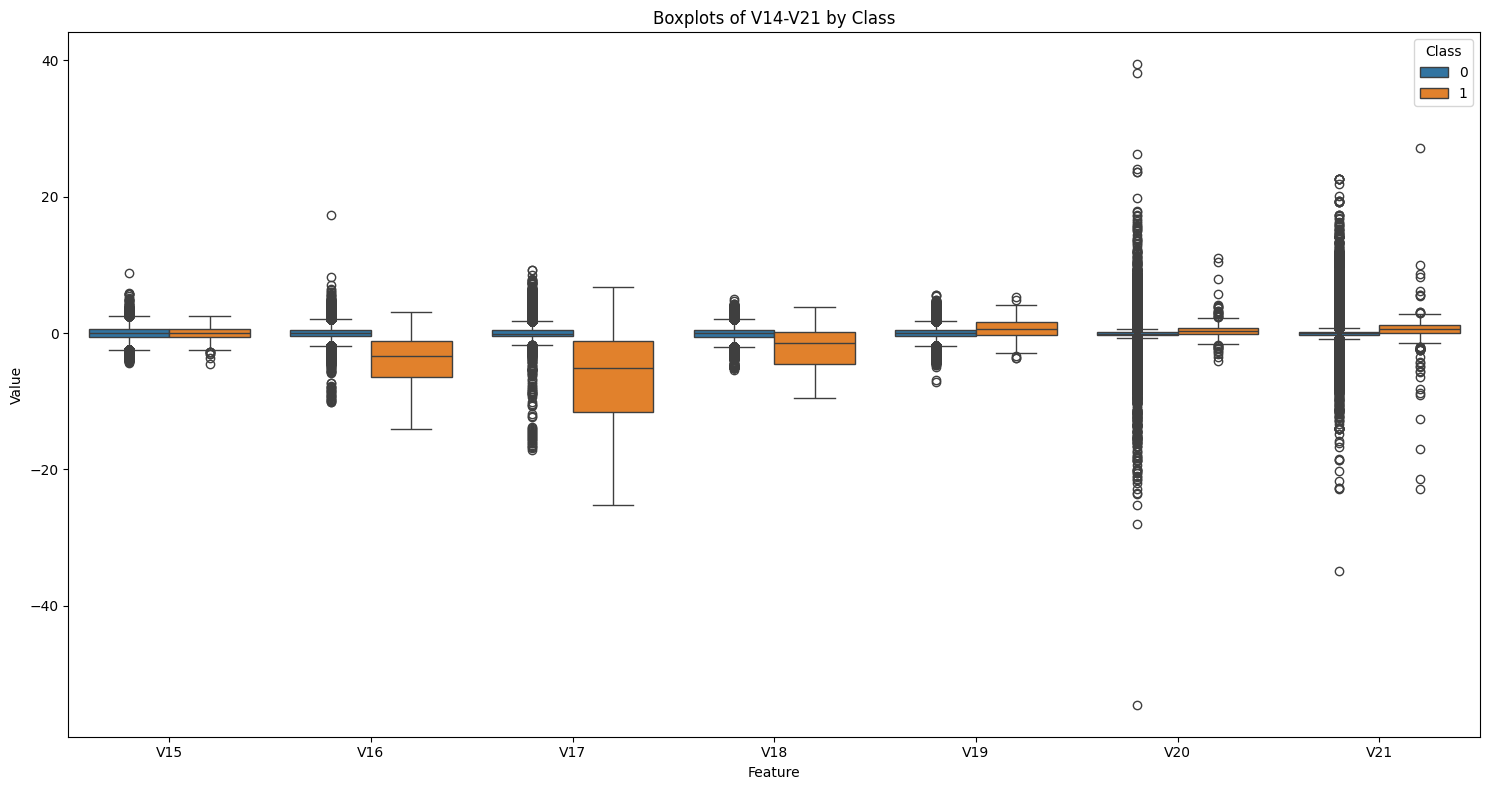

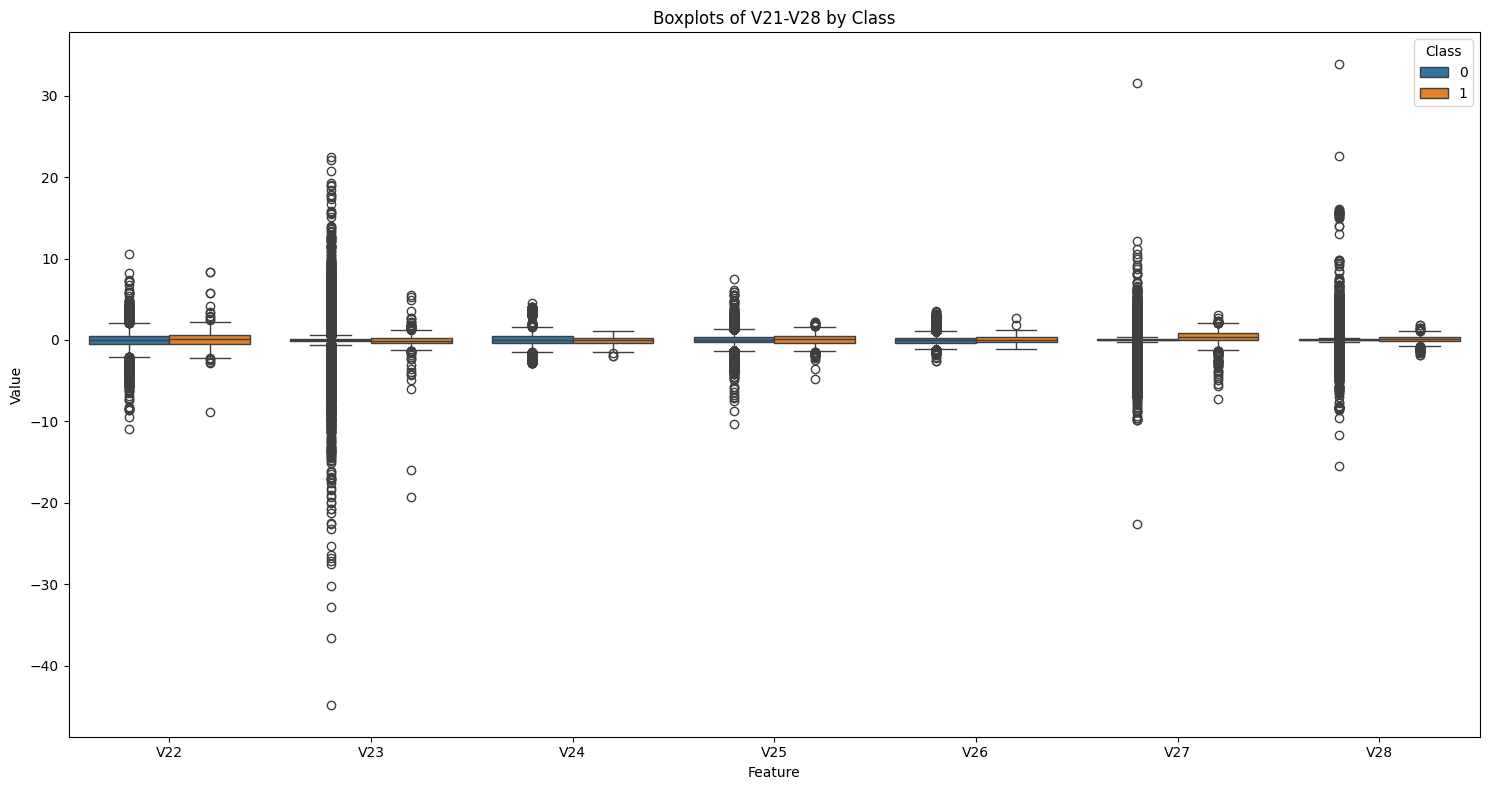

In [10]:
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], kde=True, color='green')
plt.title('Distribution of Amount')
plt.tight_layout()

# Plotting boxplots to visualize outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Amount_log'], hue=df['Class'])
plt.title('Boxplot of Log Amount')
plt.tight_layout()
plt.savefig('plots/Amount plots.png')
plt.show()
plt.close()


plt.figure(figsize=(12,5))

# Histogram for Class 0
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Time'], kde=True, color='blue', bins = 10)
plt.title('Distribution of Time - Class 0')

# Histogram for Class 1
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Time'], kde=True, color='red')
plt.title('Distribution of Time - Class 1')

plt.tight_layout()
plt.savefig('plots/Time plots.png')
plt.show()
plt.close()


chunk_size = 7
num_plots = 4
v_features = [f'V{i}' for i in range(1, 29)]
for i in range(num_plots):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size
    current_features = v_features[start_index:end_index]
    start_V = start_index + 1
    end_V = end_index 
    plt.figure(figsize=(15, 8))
    data_melted = pd.melt(df, 
                          id_vars=['Class'], 
                          value_vars=current_features, 
                          var_name='Feature', 
                          value_name='Value')
    sns.boxplot(x='Feature', y='Value', hue='Class', data=data_melted)
    plot_title = f'Boxplots of V{start_index}-V{end_index} by Class'
    plt.title(plot_title)
    plt.tight_layout() 
    plt.savefig(f'plots/v_features_{i+1}_boxplots.png')
    plt.show()
    plt.close()

From previous plots:
- It's better to use Log on the Amount column 
- Time column distribution based on each class so it's better not to remove it 
- For Fraud Class:
    - Columns *v4, v13, v16, v17, v18*  doesn't have outliers.
    - Columns *v1, v3, v7, v9, v10, v12, v14, v15, v24* have lower outliers. 
    - Columns *v11, v26* have upper outliers.
    - Columns *v2, v5, v6, v8, v19, v20, v21, v22, v25, v27, v28* have lower and upper outliers.
- Comparing between both classes in different columns:
    - Columns have same outliers results: *v1,v2, v5, v6, v8, v19, v20, v21, v22, v23, v25, v27, v28*
    - Fraud class lower outlier and Non-Fraud upper and lower outliers: *v3, v7, v10, v12, v14, v15, v24*
    - Fraud class no outlier and Non-Fraud upper and lower outliers: *v4, v13, v16, v17, v18*
    - Fraud class upper outlier and Non-Fraud lower outlier:*v11, v26*

In [11]:
df = df.drop(columns=['Amount'], errors="ignore")

In [12]:
def calculate_outlier_percentage_by_class(column):
    results = {} 
  
    for class_label in df['Class'].unique():
        df_class = df[df['Class'] == class_label]
        total_count = len(df_class)
        
        Q1 = df_class[column].quantile(0.25)
        Q3 = df_class[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df_class[
            (df_class[column] < lower_bound) | 
            (df_class[column] > upper_bound)
        ]
        
        outlier_count = len(outliers)
        
        percent = (outlier_count / total_count) * 100

        results[class_label] = f"{percent:.2f}%"
        
    return results

In [13]:
outlier_summary = []
col = [i for i in df.columns if i != 'Class']
for i in col:
    outlier_data = calculate_outlier_percentage_by_class(i)
    row = {'Feature': i}
    for class_label, percentage in outlier_data.items():
        row[f'Class {class_label} Outliers'] = percentage
    outlier_summary.append(row)


In [14]:
print("Outliers precentage in each class in different columns")
print("-" * 70)
summary_df = pd.DataFrame(outlier_summary)
print(summary_df)

Outliers precentage in each class in different columns
----------------------------------------------------------------------
       Feature Class 0 Outliers Class 1 Outliers
0         Time            0.00%            0.00%
1           V1            2.40%           11.21%
2           V2            4.66%            9.30%
3           V3            1.08%           11.84%
4           V4            3.84%            0.00%
5           V5            4.26%           10.36%
6           V6            8.04%            2.33%
7           V7            3.03%            8.88%
8           V8            8.39%           18.18%
9           V9            2.83%            2.96%
10         V10            3.17%            4.65%
11         V11            0.16%            2.54%
12         V12            5.30%            1.27%
13         V13            1.19%            0.00%
14         V14            4.85%            1.48%
15         V15            1.01%            1.69%
16         V16            2.80%          

From previous analysis will find that:
- 
As precentage of outliers on most of columns are greater than 2% then it is better to make them in the dataset and don't handle it
for Amout column the outlier can be exist so its okay to have it

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve,  average_precision_score, recall_score,fbeta_score,precision_score
from xgboost import XGBClassifier 
from sklearn.svm import SVC

In [16]:
# Preparing features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Splitting data with stratification
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
    X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
    print("Data split into training, validation and test sets.")
except Exception as e:
    print(f"Error splitting data: {e}")
    raise

Data split into training, validation and test sets.


In [17]:
scaler = StandardScaler()
cols_to_scale = ['Time', 'Amount_log']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_valid[cols_to_scale] = scaler.transform(X_valid[cols_to_scale])  
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])  

In [18]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='aucpr',
    random_state=42,
    early_stopping_rounds=30, 
)


In [19]:
print("Apply training with early stopping using XGboosting...")
model.fit(
    X_train, y_train,
    eval_set=[( X_valid,y_valid)],
    verbose=20  
)
print(f"Best number of trees used: {model.best_iteration} trees")

Apply training with early stopping using XGboosting...
[0]	validation_0-aucpr:0.45384
[20]	validation_0-aucpr:0.75983
[40]	validation_0-aucpr:0.79105
[60]	validation_0-aucpr:0.79142
[80]	validation_0-aucpr:0.82996
[100]	validation_0-aucpr:0.84417
[120]	validation_0-aucpr:0.84864
[140]	validation_0-aucpr:0.85161
[160]	validation_0-aucpr:0.85269
[180]	validation_0-aucpr:0.85230
[198]	validation_0-aucpr:0.85235
Best number of trees used: 168 trees


In [20]:
importances = model.feature_importances_
# Map importance to feature names
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
print(feature_importance_df)

       feature  importance
14         V14    0.359187
10         V10    0.157594
12         V12    0.067133
4           V4    0.060987
17         V17    0.028037
20         V20    0.024930
8           V8    0.024588
19         V19    0.024514
1           V1    0.021052
29  Amount_log    0.019439
21         V21    0.018775
11         V11    0.018355
3           V3    0.015829
13         V13    0.014972
7           V7    0.014502
23         V23    0.014275
26         V26    0.013823
6           V6    0.011462
9           V9    0.011171
18         V18    0.010990
15         V15    0.009070
16         V16    0.009013
27         V27    0.007828
22         V22    0.007538
28         V28    0.007001
5           V5    0.006377
2           V2    0.006350
0         Time    0.005468
24         V24    0.005013
25         V25    0.004726


In [24]:
def model_evaluation(model, X_test, y_test, model_name):
    """
    Evaluate classification model performance with multiple metrics.
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{model_name} Evaluation\n" + "="*50)
    print("Information for class 1:")

    # Metrics
    auc_pr = average_precision_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred, pos_label=1)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1, zero_division=0)

    print(f"AUC-PR: {auc_pr:.4f}")
    print(f"Recall score: {recall:.4f}")
    print(f"Precision score: {precision:.4f}")
    print(f"F2 score: {f2:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)

    return {
        "y_pred": y_pred,
        "auc_pr": auc_pr,
        "recall": recall,
        "precision": precision,
        "f2": f2,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp": tp,
        "cm":cm,
        "precision_curve": precision_curve,
        "recall_curve": recall_curve,
    }


In [34]:
def plot_confusion_matrix(cm,tn, fp, fn, tp, model_name="Model"):
    """
    Plot confusion matrix with emphasis on fraud errors (FN/FP).
    """

    # Create labels with counts
    labels = np.array([["TN\n{}".format(tn), "FP\n{}".format(fp)],
                      ["FN\n{}".format(fn), "TP\n{}".format(tp)]])
    
    # Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, 
                annot=labels,        # Show counts + labels
                fmt='',              # Disable number formatting
                cmap='Blues', 
                cbar=False,
                linewidths=0.5,
                annot_kws={"size": 14, "weight": "bold"})
    
    # Labels
    plt.title(f'Confusion Matrix: {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'], fontsize=11)
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'], fontsize=11, rotation=0)
    plt.tight_layout()
    plt.show()

In [21]:
top_features = feature_importance_df['feature'].head(10).tolist()
X_train1 = X_train[top_features]
X_valid1 = X_valid[top_features]
X_test1 = X_test[top_features]

In [25]:
xgb_clf = XGBClassifier(n_estimators=160, learning_rate=0.12, random_state=42)

xgb_clf.fit(X_train1, y_train)
print("Validation:")
xgb_valid_results1 = model_evaluation(xgb_clf, X_valid1, y_valid, "XGBoosting")
print("Test:")
xgb_test_results1 = model_evaluation(xgb_clf, X_test1, y_test, "XGBoosting")


Validation:

XGBoosting Evaluation
Information for class 1:
AUC-PR: 0.8162
Recall score: 0.7465
Precision score: 0.9298
F2 score: 0.7771
Confusion Matrix:
 [[42484     4]
 [   18    53]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.93      0.75      0.83        71

    accuracy                           1.00     42559
   macro avg       0.96      0.87      0.91     42559
weighted avg       1.00      1.00      1.00     42559

Test:

XGBoosting Evaluation
Information for class 1:
AUC-PR: 0.8459
Recall score: 0.7887
Precision score: 0.9655
F2 score: 0.8187
Confusion Matrix:
 [[42486     2]
 [   15    56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.97      0.79      0.87        71

    accuracy                           1.00     42559
   macro avg       0.98      0.89    

In [26]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on the training set
rf_clf.fit(X_train1, y_train)
print("Validation:")
rf_valid_results1 = model_evaluation(rf_clf, X_valid1, y_valid, "Random Forest")
print("Test:")
rf_test_results1 = model_evaluation(rf_clf, X_test1, y_test, "Random Forest")

Validation:

Random Forest Evaluation
Information for class 1:
AUC-PR: 0.8279
Recall score: 0.7465
Precision score: 0.9636
F2 score: 0.7817
Confusion Matrix:
 [[42486     2]
 [   18    53]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.96      0.75      0.84        71

    accuracy                           1.00     42559
   macro avg       0.98      0.87      0.92     42559
weighted avg       1.00      1.00      1.00     42559

Test:

Random Forest Evaluation
Information for class 1:
AUC-PR: 0.8374
Recall score: 0.7887
Precision score: 0.9825
F2 score: 0.8211
Confusion Matrix:
 [[42487     1]
 [   15    56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.98      0.79      0.88        71

    accuracy                           1.00     42559
   macro avg       0.99      0.

In [ ]:
# these parameters was used  xgb_params = {'n_estimators': [50, 100,170, 180, 200,190], 'max_depth': [3,5,10,6,8],'gamma':[2,4,6,5,8],'eta':[0.2,0.5,0.3,0.4],'learning_rate':[0.12,0.1,0.01,0.012]}
# and from the results we got these
xgb_params = {'n_estimators': [ 100,170, 180], 'max_depth': [5,6,8],'gamma':[2,4],'eta':[0.2,0.3],'learning_rate':[0.12,0.1]}
xgb_grid = GridSearchCV(XGBClassifier(random_state=123, eval_metric='logloss'), xgb_params, cv=3, scoring='recall')
xgb_grid.fit(X_train1, y_train)
xgb_model2 = xgb_grid.best_estimator_

print("\nBest XGBoost Parameters:", xgb_grid.best_params_)
xgb_valid_results2= model_evaluation(xgb_model2, X_valid1, y_valid, "XGBoosting")
xgb_valid_results2 = model_evaluation(xgb_model2, X_test1, y_test, "XGBoosting")

In [ ]:
# rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3,5,10],'max_leaf_nodes':[2,50,5]}
rf_params = {'n_estimators': [50,100,150], 'max_depth': [5,10],'max_leaf_nodes':[5,3,2]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='recall')
rf_grid.fit(X_train1, y_train)
rf_model = rf_grid.best_estimator_

print("\nBest Random Forest Parameters:", rf_grid.best_params_)

rf3_res_valid = model_evaluation(rf_model, X_valid1, y_valid, "Random Forest")
rf3_res_test = model_evaluation(rf_model, X_test1, y_test, "Random Forest")


In [27]:
top_features2 = feature_importance_df['feature'].head(15).tolist()
X_train2 = X_train[top_features2]
X_valid2 = X_valid[top_features2]
X_test2 = X_test[top_features2]

In [28]:
xgb_clf_1 = XGBClassifier(n_estimators=300, learning_rate=0.1, random_state=42)

xgb_clf_1.fit(X_train2, y_train)
print("Validation:")
xgb_valid_results_1 = model_evaluation(xgb_clf_1, X_valid2, y_valid, "XGBoosting")
print("Test:")
xgb_test_results_1 = model_evaluation(xgb_clf_1, X_test2, y_test, "XGBoosting")

Validation:

XGBoosting Evaluation
Information for class 1:
AUC-PR: 0.8280
Recall score: 0.7042
Precision score: 0.9615
F2 score: 0.7440
Confusion Matrix:
 [[42486     2]
 [   21    50]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.96      0.70      0.81        71

    accuracy                           1.00     42559
   macro avg       0.98      0.85      0.91     42559
weighted avg       1.00      1.00      1.00     42559

Test:

XGBoosting Evaluation
Information for class 1:
AUC-PR: 0.8499
Recall score: 0.8169
Precision score: 0.9831
F2 score: 0.8455
Confusion Matrix:
 [[42487     1]
 [   13    58]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.98      0.82      0.89        71

    accuracy                           1.00     42559
   macro avg       0.99      0.91    

In [29]:
rf_clf_1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on the training set
rf_clf_1.fit(X_train2, y_train)
print("Validation:")
rf_valid_results_1 = model_evaluation(rf_clf_1, X_valid2, y_valid, "Random Forest")
print("Test:")
rf_test_results_1 = model_evaluation(rf_clf_1, X_test2, y_test, "Random Forest")

Validation:

Random Forest Evaluation
Information for class 1:
AUC-PR: 0.8356
Recall score: 0.7465
Precision score: 0.9298
F2 score: 0.7771
Confusion Matrix:
 [[42484     4]
 [   18    53]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.93      0.75      0.83        71

    accuracy                           1.00     42559
   macro avg       0.96      0.87      0.91     42559
weighted avg       1.00      1.00      1.00     42559

Test:

Random Forest Evaluation
Information for class 1:
AUC-PR: 0.8329
Recall score: 0.7887
Precision score: 0.9825
F2 score: 0.8211
Confusion Matrix:
 [[42487     1]
 [   15    56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.98      0.79      0.88        71

    accuracy                           1.00     42559
   macro avg       0.99      0.

In [ ]:
# these parameters was used  xgb_params = {'n_estimators': [50, 100, 200, 500, 400], 'max_depth': [3,5,10],'gamma':[2,4,6,8,5],'eta':[0.2,0.5,0.3]}
# and from the results we got these
xgb_params2 = {'n_estimators': [170, 180, 200], 'max_depth': [10,6,8],'gamma':[6,5,8],'eta':[0.5,0.3,0.4],'learning_rate':[0.1,0.3]}
xgb_grid2 = GridSearchCV(XGBClassifier(random_state=123, eval_metric='logloss'), xgb_params2, cv=3, scoring='recall')
xgb_grid2.fit(X_train2, y_train)
xgb_model_2 = xgb_grid.best_estimator_

print("\nBest XGBoost Parameters:", xgb_grid2.best_params_)
xgb_valid_results2= model_evaluation(xgb_model_2, X_valid2, y_valid, "XGBoosting")
xgb_valid_results2 = model_evaluation(xgb_model_2, X_test2, y_test, "XGBoosting")

In [ ]:
# rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3,5,10],'max_leaf_nodes':[2,50,5]}
rf_params2 = {'n_estimators': [50,100,150], 'max_depth': [5,10,15],'max_leaf_nodes':[50,5,3]}
rf_grid2 = GridSearchCV(RandomForestClassifier(random_state=42), rf_params2, cv=3, scoring='recall')
rf_grid2.fit(X_train2, y_train)
rf_model2 = rf_grid.best_estimator_

print("\nBest Random Forest Parameters:", rf_grid2.best_params_)

rf4_res_valid = model_evaluation(rf_model, X_valid2, y_valid, "Random Forest")
rf4_res_test = model_evaluation(rf_model, X_test2, y_test, "Random Forest")


In [30]:
top_features3 = feature_importance_df['feature'].head(20).tolist()
X_train3 = X_train[top_features3]
X_valid3 = X_valid[top_features3]
X_test3 = X_test[top_features3]

In [31]:
xgb_clf_2 = XGBClassifier(n_estimators=400, learning_rate=0.1, random_state=42)

xgb_clf_2.fit(X_train3, y_train)
print("Validation:")
xgb_valid_results_2 = model_evaluation(xgb_clf_2, X_valid3, y_valid, "XGBoosting")
print("Test:")
xgb_test_results_2 = model_evaluation(xgb_clf_2, X_test3, y_test, "XGBoosting")

Validation:

XGBoosting Evaluation
Information for class 1:
AUC-PR: 0.8100
Recall score: 0.7465
Precision score: 0.9464
F2 score: 0.7794
Confusion Matrix:
 [[42485     3]
 [   18    53]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.95      0.75      0.83        71

    accuracy                           1.00     42559
   macro avg       0.97      0.87      0.92     42559
weighted avg       1.00      1.00      1.00     42559

Test:

XGBoosting Evaluation
Information for class 1:
AUC-PR: 0.8562
Recall score: 0.8028
Precision score: 1.0000
F2 score: 0.8358
Confusion Matrix:
 [[42488     0]
 [   14    57]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       1.00      0.80      0.89        71

    accuracy                           1.00     42559
   macro avg       1.00      0.90    

In [32]:
rf_clf_2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on the training set
rf_clf_2.fit(X_train3, y_train)
print("Validation:")
rf_valid_results_2 = model_evaluation(rf_clf_2, X_valid3, y_valid, "Random Forest")
print("Test:")
rf_test_results_2 = model_evaluation(rf_clf_2, X_test3, y_test, "Random Forest")

Validation:

Random Forest Evaluation
Information for class 1:
AUC-PR: 0.8392
Recall score: 0.7042
Precision score: 0.9615
F2 score: 0.7440
Confusion Matrix:
 [[42486     2]
 [   21    50]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.96      0.70      0.81        71

    accuracy                           1.00     42559
   macro avg       0.98      0.85      0.91     42559
weighted avg       1.00      1.00      1.00     42559

Test:

Random Forest Evaluation
Information for class 1:
AUC-PR: 0.8271
Recall score: 0.7887
Precision score: 0.9825
F2 score: 0.8211
Confusion Matrix:
 [[42487     1]
 [   15    56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.98      0.79      0.88        71

    accuracy                           1.00     42559
   macro avg       0.99      0.

## From Previous Computations:
- Over all results with different number of features used we will find that XGBoosting achieves high accuracy than Random Forest 
- Using different number of features will find that it's better to use 15 features in our models  

In [33]:
# Saving the model 
import joblib
joblib.dump(xgb_clf_1, 'xgb_fraud_model.joblib')

['xgb_fraud_model.joblib']